# New York State and the Opioid Crisis 
***
According to the CDC, 115 people die in the US per day due to an opioid overdose and since 1999 more than half a million people have died from an opioid overdose __[(1)](https://www.cdc.gov/drugoverdose/epidemic/index.html)__. In New York State the age adjusted rate of death per 100,000 from an opioid overdose was 15.1 compared to the national rate of 13.3 in 2016 __[(2)](https://www.drugabuse.gov/drugs-abuse/opioids/opioid-summaries-by-state/new-york-opioid-summary)__. The opioid crisis is one of the worst contemporaneous health crisis only rivaled by the AIDS epidemic of the 1990s __[(3)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5517310/)__. Outside of the high number of overdose deaths due to opioids, there is an increase in people with substance abuse disorder involving the abuse of opioids. The rates of infection from HIV, Hepatitis C and B have also increased, mostly likely due to the needle usage associated with opioid abuse __[(4)](https://www.kff.org/hivaids/issue-brief/hiv-and-the-opioid-epidemic-5-key-points/)__. New York State, as mentioned above, is one of the places with the highest rates of deaths due to opioids and has an open data site. This makes it possible to try and explore the relationship that may exist between opioid abuse and other factors like socioeconomics, crimes, and government investment. 

In [139]:
#load libraries
%matplotlib inline 

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

The first data set that we will be working from can be found __[here](https://health.data.ny.gov/Health/All-Payer-Opioid-Related-Facility-Visits-in-New-Yo/rxm6-fp54)__. The data set includes information about impatient discharges and outpatient visits related to opioids. There’s specific information available about insurance providers and specific types of visits. We’re  going to extract out county, year, and overall rate from the data set to help simplify our analysis. 

In [140]:
#importing and cleaning data
df1 = pd.read_csv('data.csv')

cols =['Year', 'Patient County Name', 'Overall Rate Per 1000']

df1 = df1.loc[:, cols]
df1= df1.rename(index=str, columns={'Patient County Name': 'County', 'Overall Rate Per 1000' : 'Overall Opioid Rate Per 1000'})

df1.head()

,Year,County,Overall Opioid Rate Per 1000
0,2010,Albany,0.405
1,2011,Albany,0.476
2,2012,Albany,0.533
3,2013,Albany,0.343
4,2014,Albany,0.331


We are now going to add in the number of opioid  overdose deaths per county to our table using the dataset found __[here](https://health.data.ny.gov/Health/Vital-Statistics-Opioid-Related-Deaths-by-County-B/sn5m-dv52)__. 

In [141]:
df2 = pd.read_csv('data2.csv')

df3 = pd.merge(df1, df2, how='inner', on=['Year', 'County'])
df3 = df3.pivot_table(df3, index=['Year', 'County'], aggfunc='sum')
df3['Opioid Poisoning Deaths'] = df3['Opioid Poisoning Deaths'].div(5)
df3 = df3.reset_index()

df2.head()

,Year,County,Opioid Poisoning Deaths
0,2015,Albany,31
1,2015,Allegany,6
2,2015,Bronx,177
3,2015,Broome,29
4,2015,Cattaraugus,11


Now that we have our opioid related data we can add in data related to other variables whose relationship with the opioid addiction crisis we want to explore. One relevant variable to look at would be crime rates due to the criminalization of drug use in most of the United States, including New York. Using the data found __[here](https://data.ny.gov/Public-Safety/Index-Violent-Property-and-Firearm-Rates-By-County/34dd-6g2j)__ we can add in county level crime counts to our dataset.

In [142]:
df4 = pd.read_csv('data3.csv')

cols2 = ['Year', 'County', 'Index Rate']

df4 = df4.loc[:, cols2]
df4 = df4.rename(index=str, columns={'Index Rate' : 'Crime Rate Per 100000'})
df4 = df4.merge(df3, how='inner', on=['Year', 'County'])

cols3= ['Year', 'County', 'Crime Rate Per 100000', 'Opioid Poisoning Deaths', 
        'Overall Opioid Rate Per 1000']

df4 = df4.loc[:, cols3]

df4.head()

,Year,County,Crime Rate Per 100000,Opioid Poisoning Deaths,Overall Opioid Rate Per 1000
0,2010,Albany,3737.6,15.0,2.978
1,2010,Allegany,1732.9,3.0,3.624
2,2010,Bronx,2450.2,37.0,2.122
3,2010,Broome,3234.6,10.0,3.053
4,2010,Cattaraugus,2635.7,1.0,1.654


Another variable to explore would be socioeconomic status of different counties. Many of the cultural stereotypes of substance abuse tend to portray those with substance abuse problems as being less well off financially. Much of the research and coverage of the opioid epidemic has also explored the relationship between socioeconomic situation, social mobility, and economic opportunity__[(5)](https://www.ncadd.org/blogs/addiction-update/what-s-behind-the-addiction-crisis-in-rural-america)__ __[(6)](https://aspe.hhs.gov/system/files/pdf/259261/ASPEEconomicOpportunityOpioidCrisis.pdf)__ __[(7)](https://ajph.aphapublications.org/doi/pdf/10.2105/AJPH.2017.304187)__.  Though there is no data available breaking down earning levels per county we can use information on recipients of SNAP, supplemental nutrition assistance program, and unemployment as a proxy. The number of SNAP beneficiaries can provide us with a measurement for the amount of people in the community below a certain earning threshold. The data for the number of SNAP recipients by county can be found __[here](https://data.ny.gov/Human-Services/Supplemental-Nutrition-Assistance-Program-SNAP-Cas/dq6j-8u8z)__.

In [143]:
df5 = pd.read_csv('data4.csv')

cols4 = ['Year', 'Month', 'District', 'Total SNAP Persons']

df5 = df5.loc[:, cols4]
df5 = df5.pivot_table(df5, index=['Year', 'District'], aggfunc='sum')
df5 = df5.reset_index()
df5 = df5.rename(index=str, columns={'District' : 'County'})
df5 = df4.merge(df5, how='inner', on=['Year', 'County'])

df5.head()

,Year,County,Crime Rate Per 100000,Opioid Poisoning Deaths,Overall Opioid Rate Per 1000,Total SNAP Persons
0,2010,Albany,3737.6,15.0,2.978,375465
1,2010,Allegany,1732.9,3.0,3.624,75199
2,2010,Broome,3234.6,10.0,3.053,335380
3,2010,Cattaraugus,2635.7,1.0,1.654,123300
4,2010,Cayuga,2251.3,7.0,2.838,115042


Data for the number of unemployement beneficiaries can be found __[here](https://data.ny.gov/Economic-Development/Unemployment-Insurance-Beneficiaries-and-Benefit-A/xbjp-8sra)__. Along with being a proxy for socioeconomic status of a county, unemployment can also be an indirect measure for exploring the relationship between lack of economic opportunity. 

In [144]:
df6 = pd.read_csv('data5.csv')

cols5 = ['Year', 'Month', 'County', 'Beneficiaries']

df6 = df6.loc[:, cols5]
df6 = df6.pivot_table(df6, index=['Year', 'County'], aggfunc='sum')

cols6 = ['Year', 'County', 'Beneficiaries']

df6 = df6.reset_index()
df6 = df6.loc[:, cols6]
df6 = df5.merge(df6, how='inner', on=['Year', 'County'])
df6 = df6.rename(index=str, columns={'Beneficiaries' : 'Total Unemployment Beneficiaries'})

df6.head()

,Year,County,Crime Rate Per 100000,Opioid Poisoning Deaths,Overall Opioid Rate Per 1000,Total SNAP Persons,Total Unemployment Beneficiaries
0,2010,Albany,3737.6,15.0,2.978,375465,46000
1,2010,Allegany,1732.9,3.0,3.624,75199,10600
2,2010,Broome,3234.6,10.0,3.053,335380,41400
3,2010,Cattaraugus,2635.7,1.0,1.654,123300,21500
4,2010,Cayuga,2251.3,7.0,2.838,115042,18300


Another way to indirectly look at the possible relationship between economic opportunity and the opioid crisis using the data available to us would be to look at the amount of government funding provided to counties. Data for the block grant alotment per county can be found __[here](https://data.ny.gov/Economic-Development/Community-Development-Block-Grant-CDBG-Contracts/n9bu-8eic)__. 

In [145]:
df7 = pd.read_csv('data6.csv')

cols7 = ['Project Year', 'Contract Amount', 'County']

df7 = df7.loc[:, cols7]
df7 = df7.pivot_table(df7, index=['Project Year', 'County'], aggfunc='sum')
df7 = df7.reset_index()
df7 = df7.rename(index=str, columns= {'Project Year' : 'Year', 'Contract Amount' : 'Total Block Grant'})
df7 = df6.merge(df7, how='inner', on=['Year', 'County'])

df7.head()

,Year,County,Crime Rate Per 100000,Opioid Poisoning Deaths,Overall Opioid Rate Per 1000,Total SNAP Persons,Total Unemployment Beneficiaries,Total Block Grant
0,2010,Albany,3737.6,15.0,2.978,375465,46000,1251000
1,2010,Allegany,1732.9,3.0,3.624,75199,10600,872300
2,2010,Broome,3234.6,10.0,3.053,335380,41400,800000
3,2010,Cattaraugus,2635.7,1.0,1.654,123300,21500,626000
4,2010,Cayuga,2251.3,7.0,2.838,115042,18300,400000


Another potential measure we can use to explore the relationship between government investment or availability of treatment is to look at the number of health facilities operating in a county. Data of certified health facilities by county can be found __[here](https://health.data.ny.gov/Health/Health-Facility-Certification-Information/2g9y-7kqm)__. The data here lists facilities by name and year they opened so we have to do a little bit more processing to get the number of health facilities operating in each county by year. 

In [146]:
df8 = pd.read_csv('data7.csv')
                  
cols8 = ['Facility Name', 'County', 'Effective Date']

df8 = df8.loc[:, cols8]
df8['Effective Date'] = pd.to_datetime(df8['Effective Date'])
df8['Year'] = df8['Effective Date'].dt.year

df8.head()

,Facility Name,County,Effective Date,Year
0,Albany Medical Center Hospital,Albany,1988-03-21,1988
1,Albany Medical Center Hospital,Albany,1994-01-18,1994
2,Albany Medical Center Hospital,Albany,1980-02-01,1980
3,Albany Medical Center Hospital,Albany,2013-08-19,2013
4,Albany Medical Center Hospital,Albany,1980-02-01,1980


In [147]:
cols9 = ['Facility Name', 'County', 'Year']

df8 = df8.loc[:, cols9]
df8 = df8.pivot_table(df8, index=['Year', 'County'], aggfunc='count')
df8 = df8.reset_index()
df8 = df8.rename(index=str, columns= {'Facility Name' : 'Total Facility Number'})

df9 = df8[df8['Year'] <= 2010]
df9 = df9.pivot_table(df9, index=['County'], aggfunc='sum')
df9['Year'] = 2010 
df9 = df9.reset_index()

df9.head()

,County,Total Facility Number,Year
0,Albany,412,2010
1,Allegany,127,2010
2,Bronx,1976,2010
3,Broome,346,2010
4,Cattaraugus,159,2010


In [148]:
df_m = df9.loc[:, ['County', 'Total Facility Number']]

df10 = df8[df8['Year'] == 2011]
df10 = df10.merge(df_m, on='County')
df10['Total Facility Number'] = df10['Total Facility Number_x'] + df10['Total Facility Number_y']
df10 = df10.loc[:,['Year', 'County', 'Total Facility Number']]

df10.head()

,Year,County,Total Facility Number
0,2011,Albany,429
1,2011,Bronx,2060
2,2011,Broome,357
3,2011,Cattaraugus,161
4,2011,Cayuga,124


In [149]:
df_m = df10.loc[:, ['County', 'Total Facility Number']]

df11 = df8[df8['Year'] == 2012]
df11 = df11.merge(df_m, on='County')
df11['Total Facility Number'] = df11['Total Facility Number_x'] + df11['Total Facility Number_y']
df11 = df11.loc[:,['Year', 'County', 'Total Facility Number']]

df11.head()

,Year,County,Total Facility Number
0,2012,Albany,432
1,2012,Bronx,2133
2,2012,Broome,379
3,2012,Cattaraugus,162
4,2012,Cayuga,125


In [150]:
df_m = df11.loc[:, ['County', 'Total Facility Number']]

df12 = df8[df8['Year'] == 2013]
df12 = df12.merge(df_m, on='County')
df12['Total Facility Number'] = df12['Total Facility Number_x'] + df12['Total Facility Number_y']
df12 = df12.loc[:,['Year', 'County', 'Total Facility Number']]

df12.head()

,Year,County,Total Facility Number
0,2013,Albany,448
1,2013,Bronx,2187
2,2013,Broome,388
3,2013,Cattaraugus,164
4,2013,Columbia,119


In [151]:
df_m = df12.loc[:, ['County', 'Total Facility Number']]

df13 = df8[df8['Year'] == 2014]
df13 = df13.merge(df_m, on='County')
df13['Total Facility Number'] = df13['Total Facility Number_x'] + df13['Total Facility Number_y']
df13 = df13.loc[:,['Year', 'County', 'Total Facility Number']]

df13.head()

,Year,County,Total Facility Number
0,2014,Albany,470
1,2014,Bronx,2436
2,2014,Broome,419
3,2014,Cattaraugus,174
4,2014,Columbia,135


In [152]:
df_m = df13.loc[:, ['County', 'Total Facility Number']]

df14 = df8[df8['Year'] == 2015]
df14 = df14.merge(df_m, on='County')
df14['Total Facility Number'] = df14['Total Facility Number_x'] + df14['Total Facility Number_y']
df14 = df14.loc[:,['Year', 'County', 'Total Facility Number']]

df14.head()

,Year,County,Total Facility Number
0,2015,Albany,487
1,2015,Bronx,2571
2,2015,Broome,441
3,2015,Cattaraugus,180
4,2015,Columbia,143


In [ ]:
frames = [df9, df10, df11, df12, df13, df14]

df15 = pd.concat(frames)
df15 = df7.merge(df15, how='inner', on=['Year', 'County'])

df15.head()

Now that we have our variables we have to control for population. Counties with larger populations will have large numbers for all our variables. We’ll use __[this](https://data.ny.gov/Economic-Development/Broadband-Availability-By-Municipality/sjc6-ftj4)__ to add in the population values for each county. 

In [154]:
df16 = pd.read_csv('data8.csv')

cols10 = ['2010 Muni Population', 'County']

df16 = df16.loc[:, cols10]
df16 = pd.pivot_table(df16, index=['County'], aggfunc='sum') 
df16 = df16.rename(index=str, columns={'2010 Muni Population' : 'Population'})
df16 = df16.reset_index()
df16 = df15.merge(df16, how='inner', on=['County'])

df16.head()

,Year,County,Crime Rate Per 100000,Opioid Poisoning Deaths,Overall Opioid Rate Per 1000,Total SNAP Persons,Total Unemployment Beneficiaries,Total Block Grant,Total Facility Number,Population
0,2010,Albany,3737.6,15.0,2.978,375465,46000,1251000,412,630588
1,2011,Albany,3510.1,19.0,1.470,409084,43600,2368842,429,630588
2,2013,Albany,3087.5,24.0,1.504,445075,37100,816000,448,630588
3,2014,Albany,2979.2,23.0,2.016,443884,30800,1345000,470,630588
4,2015,Albany,2799.9,31.0,2.131,440824,26600,600000,487,630588


Now that we have added the population numbers we can control for population by putting all our variables into rates per 1000 people, standardizing our variables.

In [155]:
df16['Crime Rate Per 1000'] = df16['Crime Rate Per 100000'] * 0.01
df16['Opioid Death Rate per 1000'] = (df16['Opioid Poisoning Deaths'] / df16['Population']) * 1000
df16['SNAP Persons per 1000'] = (df16['Total SNAP Persons'] / df16['Population']) * 1000
df16['Unemployment Beneficiaries per 1000'] = (df16['Total Unemployment Beneficiaries'] / df16['Population']) * 1000
df16['Block Grant Dollars per 1000'] = (df16['Total Block Grant'] / df16['Population']) * 1000
df16['Facility Number per 1000'] = (df16['Total Facility Number'] / df16['Population']) * 1000

cols11 = ['Year', 'County', 'Overall Opioid Rate Per 1000', 'Crime Rate Per 1000',
       'Opioid Death Rate per 1000', 'SNAP Persons per 1000',
       'Unemployment Beneficiaries per 1000', 'Block Grant Dollars per 1000',
       'Facility Number per 1000']

df16 = df16.loc[:, cols11]
df16 = df16.rename(index=str, columns={'Overall Opioid Rate Per 1000' : 'Opioid Visit Rate Per 1000'})

df16.head()

,Year,County,Opioid Visit Rate Per 1000,Crime Rate Per 1000,Opioid Death Rate per 1000,SNAP Persons per 1000,Unemployment Beneficiaries per 1000,Block Grant Dollars per 1000,Facility Number per 1000
0,2010,Albany,2.978,37.376,0.023787,595.420465,72.947788,1983.862681,0.653358
1,2011,Albany,1.470,35.101,0.030131,648.734197,69.141817,3756.560543,0.680317
2,2013,Albany,1.504,30.875,0.038060,705.809498,58.833977,1294.030334,0.710448
3,2014,Albany,2.016,29.792,0.036474,703.920785,48.843302,2132.929900,0.745336
4,2015,Albany,2.131,27.999,0.049160,699.068171,42.182852,951.492892,0.772295


In [156]:
#rename columns to make table easier to work with 
df = df16.rename(index=str, columns={'Year' : 'year', 'County' : 'county', 'Opioid Visit Rate Per 1000' : 'visits', 
                                    'Crime Rate Per 1000' : 'crime', 'Opioid Death Rate per 1000' : 'death', 
                                       'SNAP Persons per 1000' : 'snap', 'Unemployment Beneficiaries per 1000' : 'unemp', 
                                       'Block Grant Dollars per 1000' : 'grant', 'Facility Number per 1000' : 'fac'})

***
We can begin to explore the relationship between our variables and see if we can find a correlation between our economic  opportunity and socioeconomic variables and the number of opioid deaths or opioid visits in a county. Lets start by checking the distribution of the data.

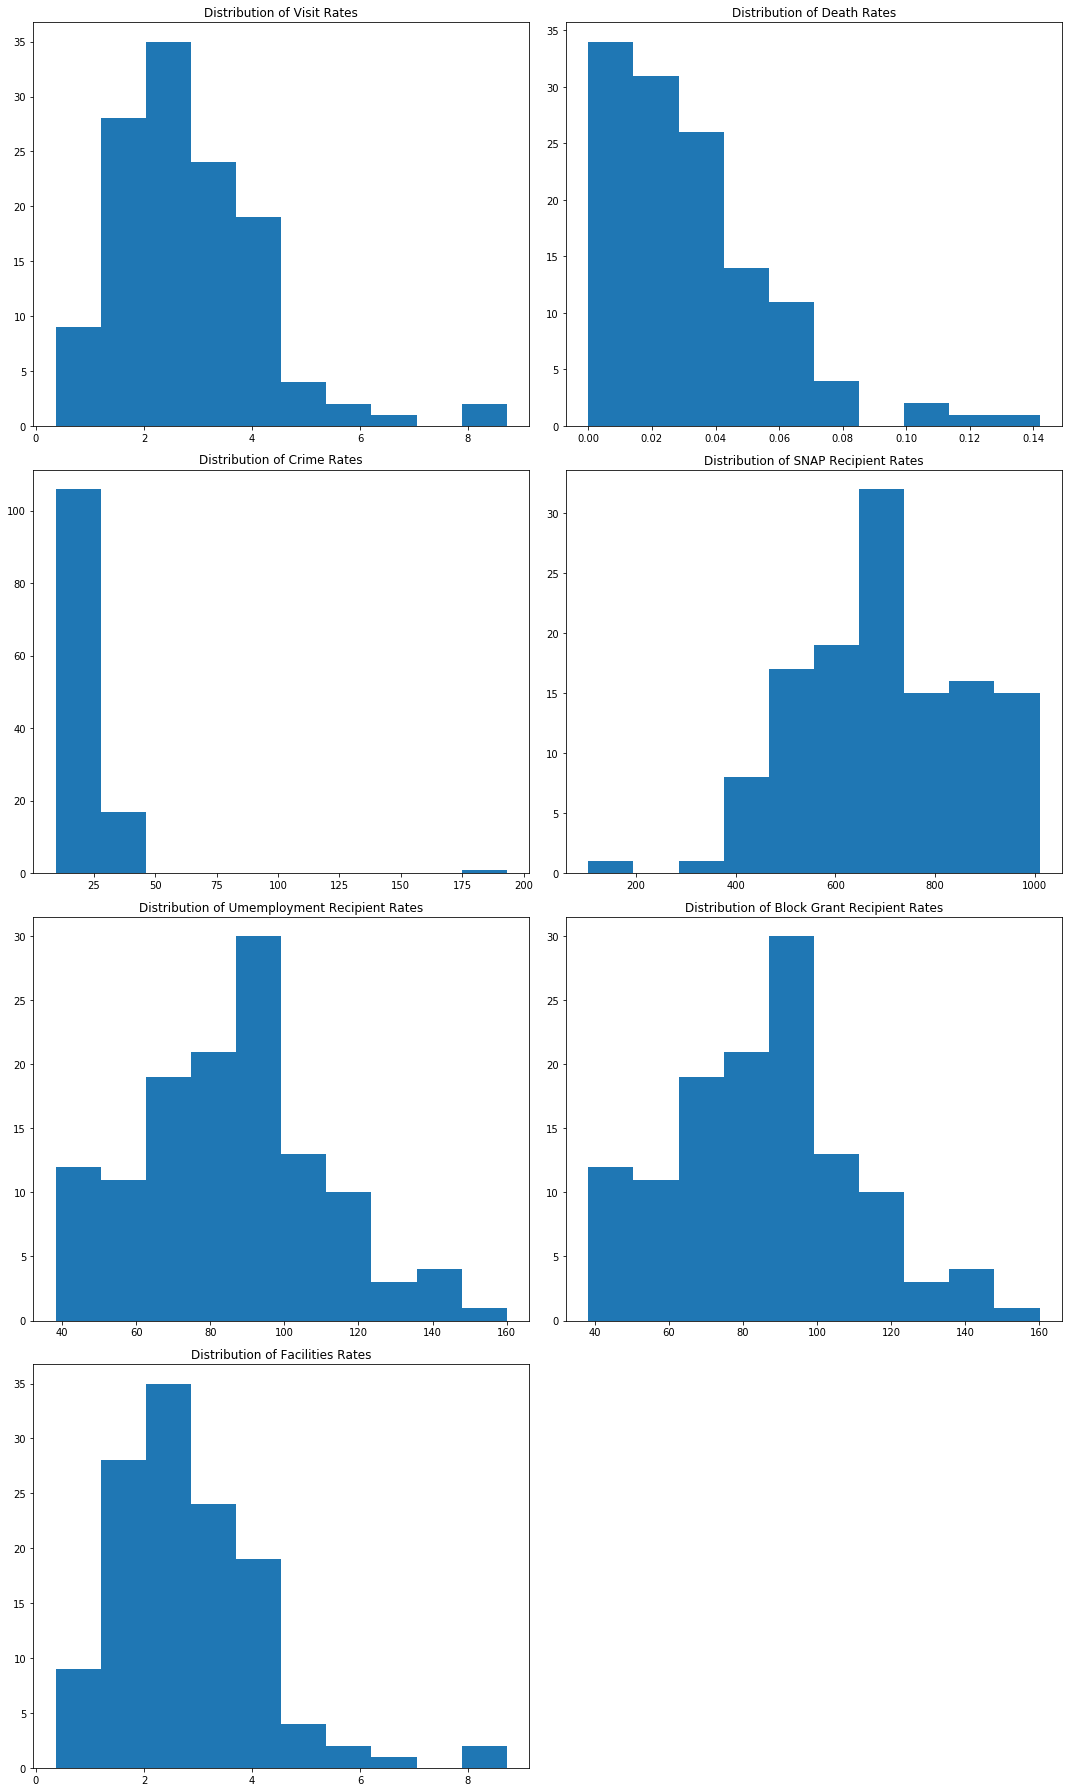

In [158]:
plt.subplot(4, 2, 1)
plt.hist(df.visits)
plt.title('Distribution of Visit Rates')

plt.subplot(4, 2, 2)
plt.hist(df.death)
plt.title('Distribution of Death Rates')

plt.subplot(4, 2, 3)
plt.hist(df.crime)
plt.title('Distribution of Crime Rates')

plt.subplot(4, 2, 4)
plt.hist(df.snap)
plt.title('Distribution of SNAP Recipient Rates')

plt.subplot(4, 2, 5)
plt.hist(df.unemp)
plt.title('Distribution of Umemployment Recipient Rates')

plt.subplot(4, 2, 6)
plt.hist(df.unemp)
plt.title('Distribution of Block Grant Recipient Rates')

plt.subplot(4, 2, 7)
plt.hist(df.visits)
plt.title('Distribution of Facilities Rates')

plt.rcParams['figure.figsize'] = [15, 25]
plt.subplots_adjust(hspace=1, wspace=0.75)
plt.tight_layout()

All of our variables have normal distributions except crime and death rate. Death rate is skewed towards the left and crime rate has one single extreme outlier. Let's check to the row with the extreme outlier for crime rate. 

In [159]:
df[df['crime'] > 150]

,year,county,visits,crime,death,snap,unemp,grant,fac
95,2010,Schoharie,3.935,193.173,0.0,551.404883,103.4682,18879.587202,0.295623


Having a rate of 193 crimes per 1,000 people is quite high and most likely due to a data entry error in our original data set. Let's drop the value and take a look at the distribution of the data without it. 

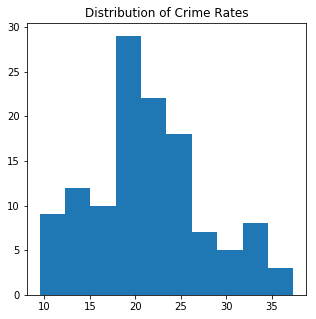

In [161]:
df = df[df['crime'] < 150]

plt.hist(df.crime)
plt.title('Distribution of Crime Rates')
plt.rcParams['figure.figsize'] = [5, 5]

Without the extreme outlying point in our dataset we can see that our crime rate distribution is also normal. We can create a correlation matrix to get an initial sense of the variables and how strongly they correlate with the visit and death rates. 

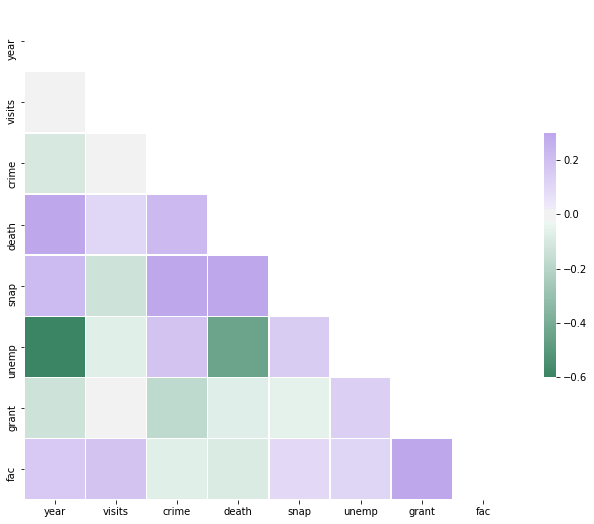

In [163]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(150, 275, as_cmap=True)

g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.rcParams['figure.figsize'] = [6, 6]

We can see from the correlation matrix above that death rate is correlated with the unemployment beneficiaries rate, SNAP beneficiaries rate, year and crime rate.The visits rate on the other hand has much weaker correlations with other variables. The variable with the strongest correlation to visits rate is facilities rate which is most likely due to the fact that places with more facilities will likely see more visits as well. Death rate is probably a better pick for our dependant variable since it has strong correlations to the other variables than visits rate. 
***
Let’s create a model for our data using linear regression. We can start off by splitting our data into training and testing sets for validation. Then we’ll fit our model to the training set and print out the list of coefficients for our variables. 


In [164]:
y = df.death
dfm = df.drop(['county', 'death'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(dfm, y, test_size=0.2)

lm = LinearRegression()

In [165]:
m = lm.fit(x_train, y_train)
p = lm.predict(x_test)

pd.DataFrame({'features': dfm.columns, 'estimated coefficients': lm.coef_})[['features', 'estimated coefficients']]

,features,estimated coefficients
0,year,0.022814
1,visits,0.011193
2,crime,0.004022
3,snap,0.000127
4,unemp,-0.001280
5,grant,0.000003
6,fac,-0.045645


We can check how well our model fits by graphing out the predicted values against the actual values. 

Text(0,0.5,'Predicted Values')

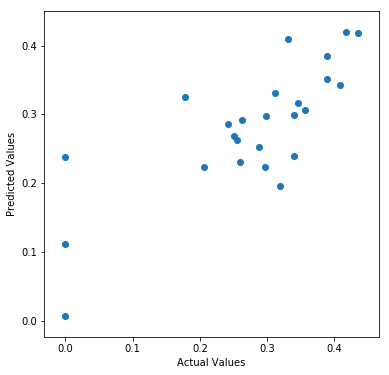

In [166]:
plt.scatter(y_test, p)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Looking at the scatterplot above we can see that many of the points seem to be around the line y = x. We can calculated the R-squared value of our plot to get a quantitative idea about how well our model fits and how much of the variation can be attributed to the model. 

In [167]:
print(m.score(x_test, y_test))

0.5982641504574718


Our R-squared score tells us that our model can predict about 60% of the variance in our dependant value. We can test out other modeling algorithms to see if any of them perform better. We'll start by fitting a deicision tree regressor to our data and comparing it to our linear regression model.

<Container object of 7 artists>

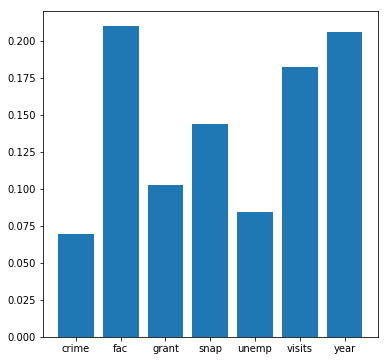

In [168]:
dtr = DecisionTreeRegressor()

m2 = dtr.fit(x_train, y_train)
p2 = dtr.predict(x_test)

feat = pd.DataFrame({'features': dfm.columns, 'feature importance': dtr.feature_importances_})

plt.bar(feat['features'], feat['feature importance'])

We can look at the bar above of the various features to understand their importance to our model. The feature importance measurements lets us know the error introduced into the model without the variable. From looking at the bar graph we can see the same variables contributed more significantly to our decision tree regression as to our linear regression: visit rate, facility rate, and year. There is a difference though for crime rate, SNAP rate, unemployment and grant rate's relative values between the two models. This isn’t a perfect comparison however since we’re looking at two different types of metrics. Let's take a look at performance of this model on our test data.

Text(0,0.5,'Predicted Values')

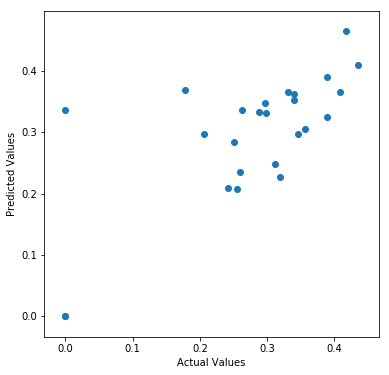

In [169]:
plt.scatter(y_test, p2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [170]:
print(m2.score(x_test, y_test))

0.4385951285371835


The R-squared value for our decision tree regressor is lower than our linear regression. We can try to remodel our data with a random forest regressor to see if that performs better. Random forest takes an average of an aggregation of different decision trees to create a model and tends to perform better. 

<Container object of 7 artists>

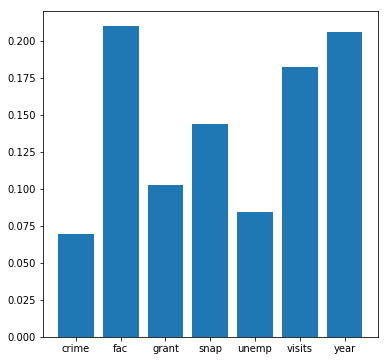

In [171]:
rfr = RandomForestRegressor()

m3 = rfr.fit(x_train, y_train)
p3 = rfr.predict(x_test)

feat2 = pd.DataFrame({'features': dfm.columns, 'feature importance': dtr.feature_importances_})

plt.bar(feat2['features'], feat2['feature importance'])

We can see from the bar graph above that order for which features were most important is almost identical to the decision tree regression model except that crime was second to last and unemployment was last whereas the reverse is true of our fores regressor. Let’s create our scatter plot and calculate our R-squared value to compare this to our other two models. 

Text(0,0.5,'Predicted Values')

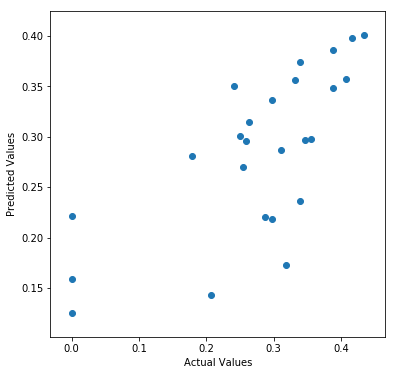

In [172]:
plt.scatter(y_test, p3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [173]:
print(m3.score(x_test, y_test))

0.4969928946152287


Our random forest regressor has only a marginally higher R-squared than our decision tree regressor. Our random forest regressor explains about 50% of the variance in our data compared to the 44% explained by our decision tree. Random forest regression tends to model data better than linear regression except in a few cases. The fact that our linear regression model is performing better probably means there is a smooth linear relationship between our variables. We can also try a gradient boosting regression model to compare to our other decision tree models.

<Container object of 7 artists>

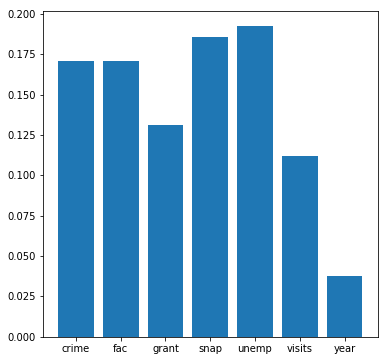

In [174]:
gbr = GradientBoostingRegressor()

m4 = gbr.fit(x_train, y_train)
p4 = gbr.predict(x_test)

feat3 = pd.DataFrame({'features': dfm.columns, 'feature importance': gbr.feature_importances_})

plt.bar(feat3['features'], feat3['feature importance'])

Gradient boosting regression builds decision trees by adding new one incrementally to adjust for the errors found in the preceding trees. Above we can see that we get different values for feature importance by doing so and year becomes much less important in this model than the other ones. We can create our scatter plot of actual and predicted values then calculate the R-squared for our new model to see how it compares to our other models. 

Text(0,0.5,'Predicted Values')

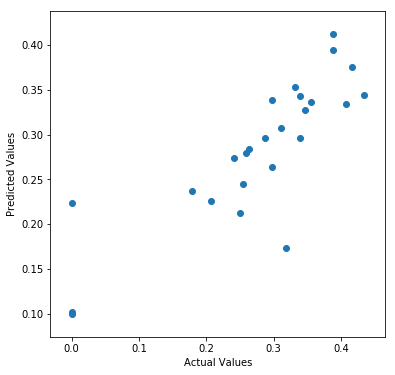

In [175]:
plt.scatter(y_test, p4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [176]:
print(m4.score(x_test, y_test))

0.6645348548311623


Our gradient boosting regressor has the best R-squared score of our four models and explains about 66% of the variance in our independent variable. R-squared is not a perfect measure of how well a model fits and can be misleading for models when the underlying data needs a model that fits a shape that isn’t linear. Our data most likely has a smooth linear shape however due to the higher R-squared score for our linear regression in comparison to our random forest regression. Gradient boosting models also have a tendency to overfit and not work as well when there’s a lot of noise in our data which can limit its predictive usefulness. Though we used a testing sample we would need to check our gradient boosting model against future data to see how well it continues to hold up. 
***
Though our models have some predictive value they can be improved by collecting better data that will actually more directly measure the variables we are interested in. Data about the average income of each county, the county budget or amount of funding it receives from the state and federal government, the amount of people who are insured, the total number of people who are unemployed not just the number receiving unemployment benefits would help us determine much more directly if there is a correlation between opioid abuse rates and limited economic opportunity and poverty. Currently I could not find that data available on the NY open data site.  

As the opioid crisis in the United States continues to be a serious issue predicting which places may be most likely to see spikes in opioid deaths and opioid related hospital visits is crucial to make the most of the limited funds available for public health programs. From our models we do see a link between variables related to socioeconomic status and government investment have some correlation to the incidence of opioid abuse. This link has been found in many previous studies conducted into the underlying factors contributing to the crisis. Even though our economy is currently going well there is bound to be a correction at some point __[(8)](https://www.cnbc.com/2018/07/31/morgan-stanley-we-think-a-coming-correction-will-be-biggest-since-fe.html)__. There has also been growing deregulation lately which is what caused the previous market crash. If a crash does take place in the near future knowing which places will face the worst of the downturn can also help us take provisional steps to ensure that anyplace seeing an increase in opioid abuse has the proper resources to deal with it.